## Audio embedding goofing around with Openl3

Setup

In [ ]:
import openl3
import soundfile as sf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
os.chdir(r"C:\Users\sethc\OneDrive - The University of Western Ontario\MDA\Fall 2023\CS 9542\project")

Compute audio embedding example (don't run)

In [ ]:
audio, sr = sf.read('HOLLOW HUNGER Raon cover (128 kbps).mp3')
emb, ts = openl3.get_audio_embedding(audio, sr) #took about 12 min 

This version computes audio embedding, but also saves it

In [4]:
#512 embedding dimension version (vs. 6144)
openl3.process_audio_file('HOLLOW HUNGER Raon cover (128 kbps).mp3', embedding_size=512) 

openl3: Processing HOLLOW HUNGER Raon cover (128 kbps).mp3 (1/1)
69/69 [==============================] - 888s 13s/step
openl3: Saved HOLLOW HUNGER Raon cover (128 kbps).npz


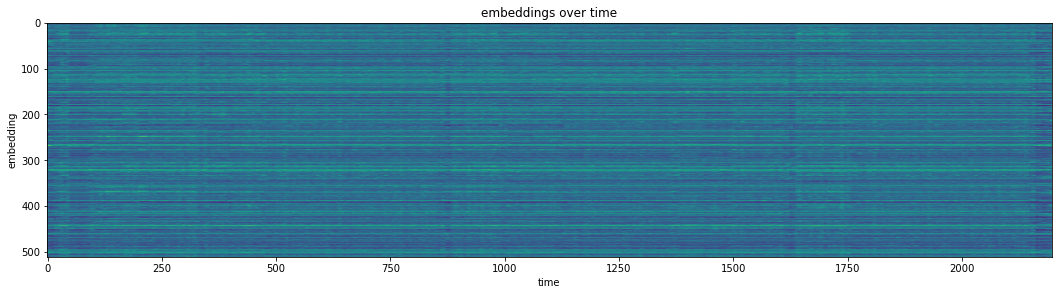

In [5]:
#try to visualize embedding overtime
with np.load('HOLLOW HUNGER Raon cover (128 kbps).npz') as data:
    emb1 = data['embedding.npy']

plt.figure(figsize=(18,10))
plt.imshow(emb1.T) 
plt.title('embeddings over time')
plt.xlabel('time')
plt.ylabel('embedding')
plt.show()

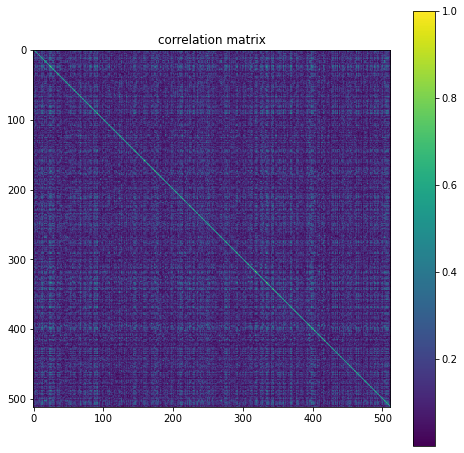

In [6]:
emb1_mean = emb1.mean(axis=0) #mean across all time units

df = pd.DataFrame(emb1)
df_corr = df.corr().abs()

plt.figure(figsize=(8,8))
plt.imshow(df_corr)
plt.title('correlation matrix')
plt.colorbar()
plt.show()

In [7]:
#audio, sr = sf.read('HOLLOW HUNGER 角巻わため Cover.mp3')
#emb3, ts3 = openl3.get_audio_embedding(audio, sr, embedding_size=512) 
openl3.process_audio_file('HOLLOW HUNGER 角巻わため Cover.mp3', embedding_size=512) 

openl3: Processing HOLLOW HUNGER 角巻わため Cover.mp3 (1/1)
70/70 [==============================] - 2183s 31s/step
openl3: Saved HOLLOW HUNGER 角巻わため Cover.npz


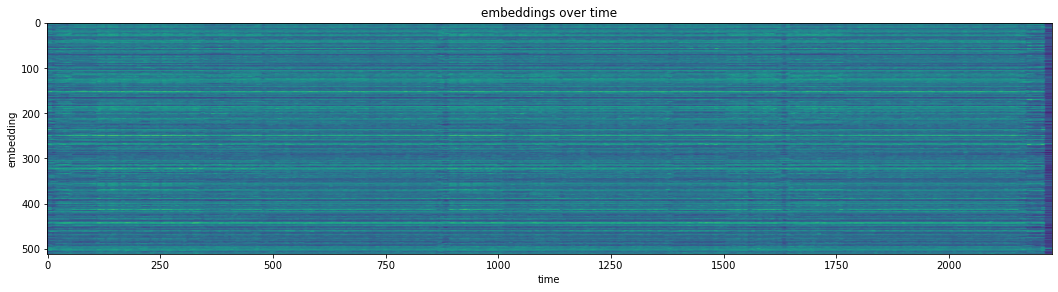

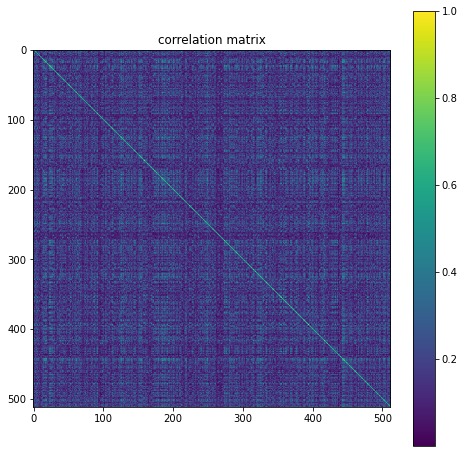

In [8]:
with np.load('HOLLOW HUNGER 角巻わため Cover.npz') as data:
    emb2 = data['embedding.npy']

plt.figure(figsize=(18,10))
plt.imshow(emb2.T)
plt.title('embeddings over time')
plt.xlabel('time')
plt.ylabel('embedding')
plt.show()

emb2_mean = emb2.mean(axis=0) 

df = pd.DataFrame(emb2)
df_corr = df.corr().abs()

plt.figure(figsize=(8,8))
plt.imshow(df_corr)
plt.title('correlation matrix')
plt.colorbar()
plt.show()

In [9]:
#compare two hollow hunger cover's embeddings
sim_score = emb1_mean@emb2_mean
print(f'similarity score between two Hollow Hunger covers: {sim_score}')

similarity score between two Hollow Hunger covers: 3432.15576171875


In [ ]:
#another jpop song but not Hollow Hunger
#audio, sr = sf.read('God ish.mp3')
#emb4, ts4 = openl3.get_audio_embedding(audio, sr, embedding_size=512) 
openl3.process_audio_file('God ish.mp3', embedding_size=512) 

In [11]:
#audio, sr = sf.read('You are my irreplaceable trasure.mp3')
#emb5, ts5 = openl3.get_audio_embedding(audio, sr, embedding_size=512) 
openl3.process_audio_file('You are my irreplaceable treasure.mp3', embedding_size=512) 

openl3: Processing You are my irreplaceable treasure.mp3 (1/1)
48/48 [==============================] - 479s 10s/step
openl3: Saved You are my irreplaceable treasure.npz


## Comparing embeddings

In [17]:
#reload saved embeddings
with np.load('HOLLOW HUNGER Raon cover (128 kbps).npz') as data:
    emb1 = data['embedding.npy']
with np.load('HOLLOW HUNGER 角巻わため Cover.npz') as data:
    emb2 = data['embedding.npy']
with np.load('God ish.npz') as data:
    emb3 = data['embedding.npy']
with np.load('You are my irreplaceable treasure.npz') as data:
    emb4 = data['embedding.npy']

In [32]:
#compute means across time
emb1_mean = emb1.mean(axis=0)
emb2_mean = emb2.mean(axis=0)
emb3_mean = emb3.mean(axis=0)
emb4_mean = emb4.mean(axis=0)

In [35]:
#compute cosine similarity
from scipy import spatial

test1 = 1-spatial.distance.cosine(emb1_mean,emb2_mean)
test2 = 1-spatial.distance.cosine(emb1_mean,emb3_mean)
test3 = 1-spatial.distance.cosine(emb1_mean,emb4_mean)

print(f'Similarity score between two Hollow Hunger covers: {test1}')
print(f'Similarity score between two Jpop songs: {test2}')
print(f'Similarity score between two Jpop song and slow piano song: {test3}')

Similarity score between two Hollow Hunger covers: 0.9947893023490906
Similarity score between two Jpop songs: 0.9897312521934509
Similarity score between two Jpop song and slow piano song: 0.9473809599876404


Note: under the current method, songs appear quite similar, is there a way to better use the temporal data instead collapsing it with the mean?